# Getting started with Keras and Tensorflow

<img src="figures/keras-tensorflow-logo.jpg">

## Introduction

* TensorFlow is an end-to-end open source platform for ML 
* It has a comprehensive, flexible ecosystem of tools and libraries 
* Allows to easily build and deploy ML powered applications.
* Not only Neural Networks




## https://keras.io

* Keras is a high-level neural networks API (front-end), written in Python
* Capable of running on top of TensorFlow, CNTK, or Theano (backends)
* Built to simplify access to more complex backend libraries

## https://keras.io

Use Keras if you need a deep learning library that:

* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.


## https://tensorflow.org

Use *TensorFlow* if you want a finer level of control:

* Build your own NN layers
* Personalized cost function
* More complex architectures than those available on Keras
    
We will be mostly writing python code using Keras libraries, but "under the hood" Keras is using tensorflow libraries.

The documentation is at [keras.io](https://keras.io).


## If you want to use R instead of python

* Keras can run on R as well, it will look quite similar to the code in this notebook
* (but, you know, with <- instead of =)
* You find the docs here: https://keras.rstudio.com/
* We will also have a lab session completely in R

## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually > such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.





## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually > such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.

## TensorFlow operates on tensors

> TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors.

## The first step is to build a graph of operations

* NNs are defined in TensorFlow as graphs through which the data flows until the final result is produced
* Before we can do any operation on our data (images, etc) we need to build the graph of tensor operations
* When we have a full graph built from input to output, we can run (flow) our data (training or testing) through it.


## Tensors and data are *not* the same thing
* Tensors are, rather, a symbolic representation of the data
* Think about the function g = f(x): as long as we do not provide a value to x, we will not have a fully computed g
* In this case, "g" is the output tensor, "x" the input tensor, "f" the tensor operation


## Example

* We have a set of color images of size 1000x1000 pixels (1 megapixel) that we want to use on our NN 
* We define tensors with shape (n, 1000, 1000, 3)
    * n is the number of images that we are presenting to our network in one go ("batch block")
    * 1000\*1000: image pixels
    * 3 is the number of channels (RGB)
    * Grayscale images tensors would have shape (n, 1000, 1000, 1)

## One thing to remember when operating on tensors

The dimensions between tensors coming out of the n-th node and those going into the (n+1)-th node *must* match:

* If each sample in our dataset is made of 10 features, the first (input) layer must accept a tensor of shape (n, 10)
* If the first layer in our NN outputs a 3D tensor, the second layer must accept a 3D tensor as input
* Check the documentation to make sure what input-output shapes are allowed

## Here's how a NN layer looks like in TensorFlow:

<img src="figures/run_metadata_graph.png" align="center">

## A neural network in Keras is called a Model

The simplest kind of model is of the Sequential kind:

In [1]:
from keras.models import Sequential

model = Sequential()

This is an "empty" model, with no layers, no inputs or outputs are defined either.

Adding layer is easy:

In [2]:
from keras.layers import Dense

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))


A "Dense" layer is a fully connected layer as the ones we have seen in Multi-layer Perceptrons.
The above is equal to having this network:

<img src="figures/simplenet.png">


If we want to see the layers in the Model this far, we can just call:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Using "model.add()" keeps stacking layers on top of what we have:

In [10]:
model.add(Dense(units=2, activation=None))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6

If we want to see the layers in the Model this far, we can just call:

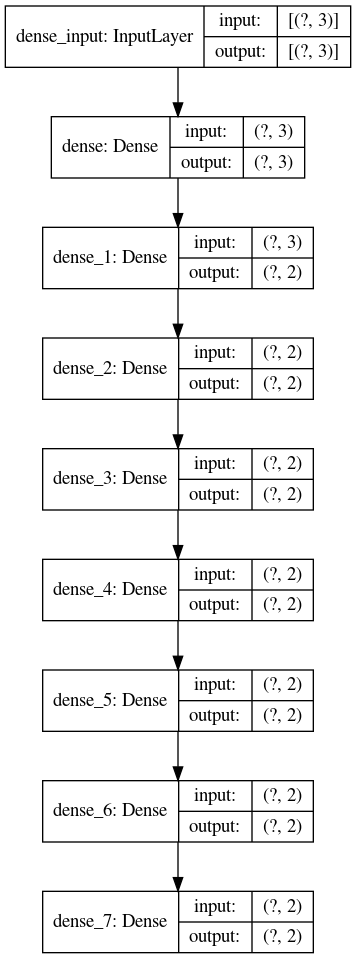

In [11]:
from keras.utils import plot_model

plot_model(model, "figures/simplenet_model.png", show_shapes=True)